In [350]:
# %pip install tensorflow
# %pip install keras

# %pip install --upgrade keras
# %pip install --upgrade keras-cv
# %pip install --upgrade keras-hub
# %pip install --upgrade keras
# %pip install --upgrade typing_extensions

# info http://neuralnetworksanddeeplearning.com/chap1.html


# Config for 1 or 2 Hidden Layers in the Neural Network | True = ON, False = OFF
Layer_ONE                       = True
Layer_TWO                       = True

KFOLD                           = 10
EPOCHS                          = 2
BATCH_SIZE                      = 128


HiddenLayer_ONE_Neurons         = 32
HiddenLayer_TWO_Neurons         = 16

Output_Neurons                  = 10   # Assuming MNIST digits: 10 output classes

# 0 = sigmoid, 1 = tanh, 2 = relu, 3 = leaky relu, 4 = softmax 
ChooseActivationFunction_ONE    = 2 
ChooseActivationFunction_TWO    = 2 
 
ChooseActivationFunction_OUTPUT = 4 

import tensorflow as tf
import numpy as np
from sklearn.model_selection import KFold

In [351]:
# Lade das MNIST-Datenset und teile es in Trainings- und Testdaten auf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Prüfe, ob die Datensätze die erwarteten Formen haben
assert x_train.shape == (60000, 28, 28) # Input 
assert x_test.shape == (10000, 28, 28)  # Input
assert y_train.shape == (60000,)        # Feature/Label
assert y_test.shape == (10000,)         # Feature/Label
    
    
# Erstelle ein tf.data.Dataset aus dem Trainingsdatensatz
# Dabei werden die Bilder und Labels als Dictionary abgelegt, um später über die Schlüssel zugreifen zu können
ds = tf.data.Dataset.from_tensor_slices({"image": x_train, "label": y_train})


In [352]:
def Layer_ONE_ACTIVATION(choice):
  if choice == 0:
    return "sigmoid"
  elif choice == 1:
    return "tanh"
  elif choice == 2:
    return "relu"
  elif choice == 3:
    return tf.keras.layers.LeakyReLU() 
  elif choice == 4:
    return "softmax"
  else:
    return "sigmoid"

def Layer_TWO_ACTIVATION(choice):
  if choice == 0:
    return "sigmoid"
  elif choice == 1:
    return "tanh"
  elif choice == 2:
    return "relu"
  elif choice == 3:
    return tf.keras.layers.LeakyReLU()
  elif choice == 4:
    return "softmax"
  else:
    return "sigmoid"

def OUTPUT_ACTIVATION(choice):
  if choice == 0:
    return "sigmoid"
  elif choice == 1:
    return "tanh"
  elif choice == 2:
    return "relu"
  elif choice == 3:
    return tf.keras.layers.LeakyReLU()
  elif choice == 4:
    return "softmax"
  else:
    return "sigmoid"


#------------------------------------------------------------------------------
# Model CONFIGURATION
#------------------------------------------------------------------------------

if Layer_ONE:
  activation_one = Layer_ONE_ACTIVATION(ChooseActivationFunction_ONE)

if Layer_TWO:
  activation_two = Layer_TWO_ACTIVATION(ChooseActivationFunction_TWO)

if Output_Neurons: 
  activation_output = OUTPUT_ACTIVATION(ChooseActivationFunction_OUTPUT)


# Build the model using the chosen activations
layers = [
  tf.keras.layers.Input(shape=(28, 28, 1)),
  tf.keras.layers.Flatten()
]

if Layer_ONE:
  layers.append(tf.keras.layers.Dense(HiddenLayer_ONE_Neurons, activation=activation_one))

if Layer_TWO:
  layers.append(tf.keras.layers.Dense(HiddenLayer_TWO_Neurons, activation=activation_two))

layers.append(tf.keras.layers.Dense(Output_Neurons, activation=activation_output))

model = tf.keras.Sequential(layers)


In [353]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [354]:
# Training mit Early Stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [355]:
if KFOLD:
  kfold = KFold(n_splits=KFOLD, shuffle=True)
  histories = []
  for train_index, test_index in kfold.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    history = model.fit(x_train_fold, y_train_fold, epochs=EPOCHS, batch_size=BATCH_SIZE, 
                        validation_data=(x_val_fold, y_val_fold), callbacks=[early_stop])
    histories.append(history)
    loss, accuracy = model.evaluate(x_test, y_test)
else:
    history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(x_test, y_test))
    loss, accuracy = model.evaluate(x_test, y_test)

Epoch 1/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4068 - loss: 9.8644 - val_accuracy: 0.7297 - val_loss: 0.9835
Epoch 2/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7501 - loss: 0.8135 - val_accuracy: 0.8090 - val_loss: 0.6708
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8108 - loss: 0.7108
Epoch 1/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8269 - loss: 0.5878 - val_accuracy: 0.8612 - val_loss: 0.5172
Epoch 2/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8698 - loss: 0.4559 - val_accuracy: 0.8838 - val_loss: 0.4532
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8762 - loss: 0.4698
Epoch 1/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8901 - loss: 0.3907 - val_accuracy: 0.8847 - val_loss: 0.4106
Epoch 2/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9025 - loss: 0.3486 - val_accuracy: 0.8973 - val_loss: 0.3854
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8972 - loss: 0.3972
Epoch 1/2
422

In [356]:
# if KFOLD:    
#     kf = KFold(n_splits=KFOLD)
#     kf.get_n_splits(x_train)
#     print(kf)
#     for train_index, test_index in kf.split(x_train):
#         print("TRAIN:", train_index, "TEST:", test_index)
#         x_train, x_test = x_train[train_index], x_train[test_index]
#         y_train, y_test = y_train[train_index], y_train[test_index]
#         print(x_train, x_test)
#         print(y_train, y_test)
#         print("KFOLD is done")
# else:
#     print("KFOLD is not set")

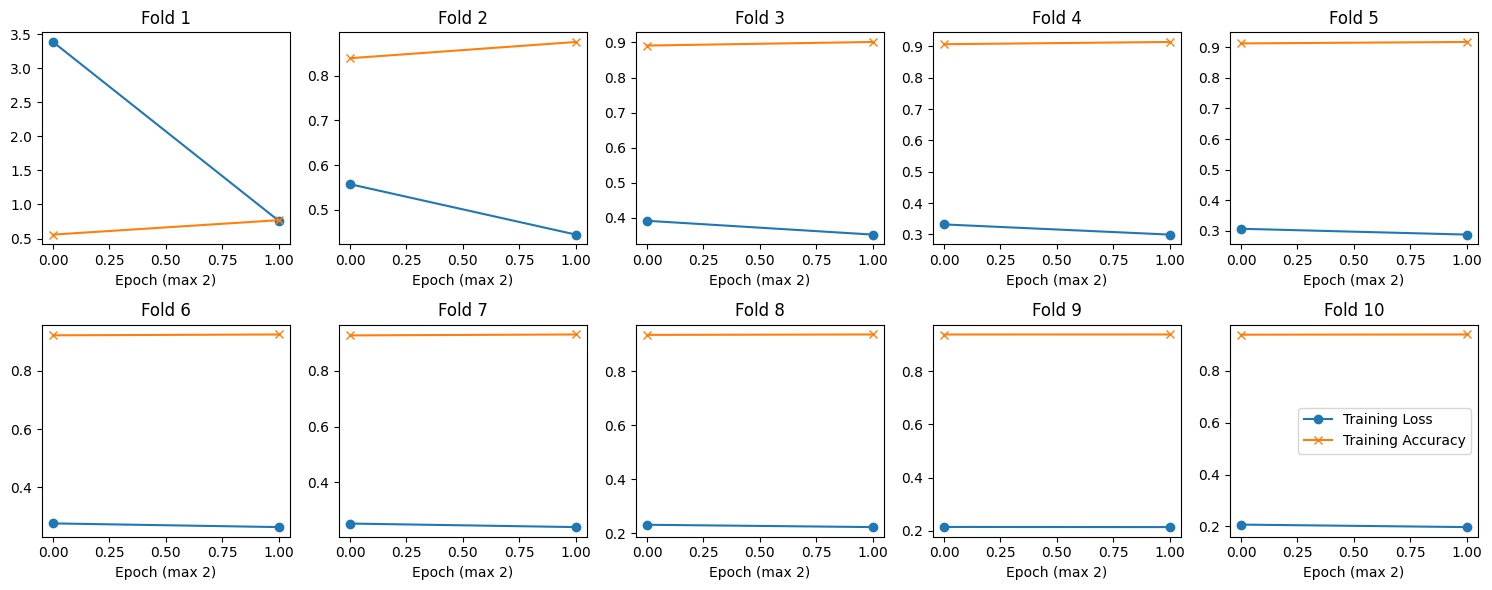

In [363]:
import matplotlib.pyplot as plt
if KFOLD:
    

    n_folds = len(histories)
    if n_folds >= 5:
        cols = (n_folds + 1) // 2  
        rows = 2
        fig, axs = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
        axs = axs.flatten()
    else:
        fig, axs = plt.subplots(1, n_folds, figsize=(n_folds * 3, 3))
        if n_folds == 1:
            axs = [axs]
    
    for i, hist in enumerate(histories):
        ax = axs[i]
        ax.plot(hist.history['loss'], marker='o', label='Training Loss')
        ax.plot(hist.history['accuracy'], marker='x', label='Training Accuracy')
        ax.set_xlabel(f'Epoch (max {EPOCHS})')
        ax.set_title(f'Fold {i+1}')
    
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    ax.legend()
    plt.tight_layout()
    plt.show()
    
else:
    plt.figure(figsize=(3,2))
    plt.plot(history.history['loss'], marker='o', label='Training Loss')
    plt.plot(history.history['accuracy'], marker='x', label='Training Accuracy')
    plt.xlabel(f'Epoch (max {EPOCHS})')
    plt.title('Training Loss and Accuracy')
    plt.legend()
    plt.show()


In [364]:
# import matplotlib.pyplot as plt

# # Prepare data for the diagram
# metrics = ['Loss (Cost Function)', 'Accuracy']
# values = [loss, accuracy]

# plt.figure(figsize=(6, 4))
# bars = plt.bar(metrics, values, color=['red', 'blue'])
# plt.title('Test Loss and Accuracy')

# # Annotate each bar with its value
# for bar in bars:
#     y_val = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, y_val, f'{y_val:.4f}', ha='center', va='bottom')
    
# plt.show()

In [365]:
import os
os.makedirs("Models", exist_ok=True)

model.save("Models/saved_modell.keras")  # Speichert Architektur, Gewichte und Optimizer-Zustand
model.save_weights("Models/gewichte.weights.h5")  # Nur Gewichte speichern

from tensorflow.keras.models import load_model
load_modell = load_model("Models/saved_modell.keras")
load_modell.summary()  # Zeigt die Architektur an

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_29 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,456 (302.57 KB)

 Trainable params: 25,818 (100.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 51,638 (201.71 KB)